In [1]:
from gentype import EnsemblClient, DataManager, PiCollapsedNonparametricGibbsSampler
import matplotlib.pyplot as plt
import numpy as np

Set up Classes:

In [2]:
Database_Name = "Gentype_DB.db"
client = EnsemblClient()
data_manager = DataManager(client, Database_Name)

In [ ]:
#for pop in data_manager.get_populations():
#    print(pop[-3:])
#    data_manager.fetch_individuals(pop[-3:], "1000GENOMES:phase_3") 

The following will fill the Database which can be expected to take a while. If the database was already filled it is not necessary to execute the cell below.
You can however copy and alter specific statements to fetch different data.
In order to inspect the resulting database I recommend https://sqlitebrowser.org/.
The database should be found in the same directory as this notebook.

In [5]:
#data_manager.fetch_reference_set()
#data_manager.fetch_reference_sequences("GRCh38")
#data_manager.fetch_populations(pop_filter = None)
# fetch_individuals defaults to ALL
##data_manager.fetch_individuals()
#in order to relate the individuals to specific populations we need to fetch them with respect to that population
#data_manager.fetch_variants(29941260, 29945884, "6")
#data_manager.fetch_individuals("CHB", "1000GENOMES:phase_3") 

The following generates a inference matrix from the data provided by the local database. The inference matrix can be constructed with respect to a population and a section specified by start and end. Be sure to fetch the according population before constructing the matrix. If _sum_allels = True_ is passed, the expression for an individual per allele will be summed (if expressed on both -> 2, on one -> 1, on neither -> 0). Otherwise each strand will be represented by a seperate row.

In [9]:
inference_matrix = data_manager.generate_inference_matrix(start = 29941260, end = 29945884, population = "ALL")
inference_matrix.shape

(5008, 438)

In [7]:
inference_matrix.sum(axis=1).mean()

98.64277156549521

Iteration: 1; Current clusters: 8; Likelihood: -2384317.591
Iteration: 2; Current clusters: 8; Likelihood: -2372461.131
Iteration: 3; Current clusters: 8; Likelihood: -2372227.847
Iteration: 4; Current clusters: 8; Likelihood: -2371829.730
Iteration: 5; Current clusters: 8; Likelihood: -2370939.989
Iteration: 6; Current clusters: 7; Likelihood: -2370680.525
Iteration: 7; Current clusters: 7; Likelihood: -2370749.633
Iteration: 8; Current clusters: 7; Likelihood: -2370778.222
Iteration: 9; Current clusters: 7; Likelihood: -2370812.049
Iteration: 10; Current clusters: 7; Likelihood: -2370709.547
Iteration: 11; Current clusters: 7; Likelihood: -2370782.494
Iteration: 12; Current clusters: 7; Likelihood: -2370752.092
Iteration: 13; Current clusters: 7; Likelihood: -2370833.806
Iteration: 14; Current clusters: 7; Likelihood: -2370769.026
Iteration: 15; Current clusters: 7; Likelihood: -2370767.264
Iteration: 16; Current clusters: 7; Likelihood: -2370819.665
Iteration: 17; Current clusters: 

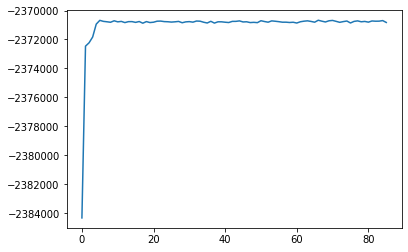

In [13]:
model1 = PiCollapsedNonparametricGibbsSampler(1)
model1.fit(inference_matrix, num_burn_in_steps = 50, delta = 2, alpha = 0.1)
plt.plot(model1.ll_list)

Iteration: 1; Current clusters: 10; Likelihood: -2377317.303
Iteration: 2; Current clusters: 10; Likelihood: -2372085.388
Iteration: 3; Current clusters: 9; Likelihood: -2371928.568
Iteration: 4; Current clusters: 9; Likelihood: -2371816.869
Iteration: 5; Current clusters: 9; Likelihood: -2370936.639
Iteration: 6; Current clusters: 8; Likelihood: -2370634.482
Iteration: 7; Current clusters: 9; Likelihood: -2370605.769
Iteration: 8; Current clusters: 8; Likelihood: -2370471.058
Iteration: 9; Current clusters: 8; Likelihood: -2370613.816
Iteration: 10; Current clusters: 8; Likelihood: -2370521.342
Iteration: 11; Current clusters: 8; Likelihood: -2370431.474
Iteration: 12; Current clusters: 8; Likelihood: -2370574.595
Iteration: 13; Current clusters: 8; Likelihood: -2370542.445
Iteration: 14; Current clusters: 8; Likelihood: -2370564.708
Iteration: 15; Current clusters: 9; Likelihood: -2370663.586
Iteration: 16; Current clusters: 9; Likelihood: -2370661.918
Iteration: 17; Current clusters

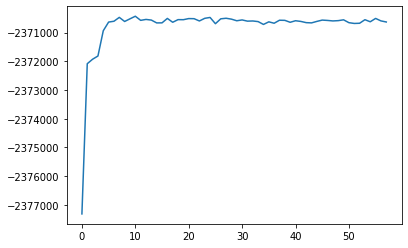

In [14]:
model2 = PiCollapsedNonparametricGibbsSampler(1)
model2.fit(inference_matrix, num_burn_in_steps = 50, delta = 2, alpha = 1)
plt.plot(model2.ll_list)

Iteration: 1; Current clusters: 11; Likelihood: -2364777.526
Iteration: 2; Current clusters: 11; Likelihood: -2340777.886
Iteration: 3; Current clusters: 13; Likelihood: -2340326.330
Iteration: 4; Current clusters: 11; Likelihood: -2339124.262
Iteration: 5; Current clusters: 11; Likelihood: -2338612.810
Iteration: 6; Current clusters: 12; Likelihood: -2338534.783
Iteration: 7; Current clusters: 12; Likelihood: -2338458.389
Iteration: 8; Current clusters: 12; Likelihood: -2338656.287
Iteration: 9; Current clusters: 11; Likelihood: -2338462.759
Iteration: 10; Current clusters: 10; Likelihood: -2338423.369
Iteration: 11; Current clusters: 9; Likelihood: -2338536.668
Iteration: 12; Current clusters: 10; Likelihood: -2338556.904
Iteration: 13; Current clusters: 11; Likelihood: -2338491.866
Iteration: 14; Current clusters: 13; Likelihood: -2338480.819
Iteration: 15; Current clusters: 9; Likelihood: -2338517.098
Iteration: 16; Current clusters: 13; Likelihood: -2338474.216
Iteration: 17; Curr

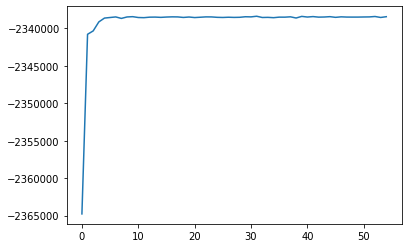

In [18]:
model3 = PiCollapsedNonparametricGibbsSampler(1)
model3.fit(inference_matrix, num_burn_in_steps = 50, delta = 1, alpha = 10)
plt.plot(model3.ll_list)

The following cell runs the sampler using the inference matrix.

In [21]:
list(inference_matrix[sampler.Z == 0].sum(axis=0))

[1.0,
 4.0,
 509.0,
 0.0,
 0.0,
 510.0,
 510.0,
 509.0,
 510.0,
 510.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 12.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1020.0,
 510.0,
 0.0,
 510.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 510.0,
 0.0,
 0.0,
 509.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 510.0,
 0.0,
 0.0,
 510.0,
 0.0,
 510.0,
 0.0,
 1.0,
 510.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 510.0,
 0.0,
 0.0,
 11.0,
 1.0,
 0.0,
 1.0,
 16.0,
 0.0,
 0.0,
 522.0,
 498.0,
 0.0,
 0.0,
 0.0,
 12.0,
 32.0,
 14.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 7.0,
 0.0,
 0.

In [22]:
list(inference_matrix[sampler.Z == 1].sum(axis=0))

[1225.0,
 1225.0,
 0.0,
 0.0,
 1231.0,
 1231.0,
 1231.0,
 0.0,
 9.0,
 9.0,
 0.0,
 0.0,
 1228.0,
 1220.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1225.0,
 1231.0,
 0.0,
 0.0,
 5.0,
 1225.0,
 5.0,
 1231.0,
 1231.0,
 1231.0,
 1209.0,
 1209.0,
 0.0,
 0.0,
 0.0,
 1225.0,
 2462.0,
 3.0,
 0.0,
 1231.0,
 0.0,
 0.0,
 0.0,
 1231.0,
 1229.0,
 1235.0,
 0.0,
 0.0,
 0.0,
 1231.0,
 0.0,
 1.0,
 1228.0,
 1.0,
 1231.0,
 1231.0,
 1226.0,
 0.0,
 5.0,
 1231.0,
 5.0,
 0.0,
 1231.0,
 0.0,
 1227.0,
 0.0,
 1231.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 3.0,
 1225.0,
 3.0,
 3.0,
 3.0,
 1231.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1226.0,
 2.0,
 0.0,
 1231.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1228.0,
 9.0,
 9.0,
 1.0,
 1219.0,
 0.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1219.0,
 0.0,
 1.0,
 1231.0,
 11.0,
 0.0,
 0.0,
 0.0,
 6.0,
 1222.0,
 1222.0,
 0.0,
 5.0,
 1234.0,
 0.0,
 0.0,
 1234.0,
 1.0,
 0.0,
 1.0,
 1234.0,
 0.0,
 0.0,
 218.0,
 102.0,
 1.0,
 4.0,
 4.0,
 35.0,
 0.0,
 1226.0,
 0.0,
 0.0,
 0.0,
 113.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1

In [23]:
list(inference_matrix[sampler.Z == 2].sum(axis=0))


[4.0,
 4.0,
 0.0,
 0.0,
 40.0,
 22.0,
 280.0,
 0.0,
 73.0,
 73.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 45.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 53.0,
 48.0,
 48.0,
 4.0,
 4.0,
 1.0,
 0.0,
 0.0,
 0.0,
 116.0,
 0.0,
 0.0,
 47.0,
 266.0,
 0.0,
 0.0,
 28.0,
 0.0,
 27.0,
 556.0,
 0.0,
 0.0,
 280.0,
 0.0,
 75.0,
 0.0,
 0.0,
 14.0,
 14.0,
 0.0,
 0.0,
 0.0,
 280.0,
 1.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 280.0,
 2.0,
 0.0,
 276.0,
 0.0,
 0.0,
 0.0,
 12.0,
 0.0,
 12.0,
 12.0,
 12.0,
 28.0,
 0.0,
 0.0,
 0.0,
 22.0,
 34.0,
 0.0,
 0.0,
 17.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 27.0,
 54.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 281.0,
 278.0,
 0.0,
 27.0,
 11.0,
 0.0,
 11.0,
 29.0,
 0.0,
 0.0,
 586.0,
 0.0,
 0.0,
 280.0,
 280.0,
 280.0,
 0.0,
 288.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 276.0,
 276.0,
 1.0,
 4.0,
 3.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 5.0,
 6.0,
 139.0,
 19.0,
 1.0,

In [24]:
list(inference_matrix[sampler.Z == 3].sum(axis=0))


[292.0,
 576.0,
 1.0,
 0.0,
 1380.0,
 1381.0,
 1382.0,
 1.0,
 309.0,
 309.0,
 202.0,
 787.0,
 1381.0,
 4.0,
 134.0,
 1.0,
 0.0,
 737.0,
 534.0,
 1380.0,
 3.0,
 0.0,
 570.0,
 532.0,
 570.0,
 1381.0,
 1381.0,
 1381.0,
 888.0,
 888.0,
 0.0,
 50.0,
 24.0,
 534.0,
 2762.0,
 434.0,
 1.0,
 1380.0,
 1.0,
 0.0,
 202.0,
 1380.0,
 544.0,
 1380.0,
 386.0,
 1.0,
 0.0,
 1382.0,
 519.0,
 217.0,
 576.0,
 0.0,
 1380.0,
 1380.0,
 579.0,
 446.0,
 325.0,
 1381.0,
 1.0,
 137.0,
 1380.0,
 0.0,
 3.0,
 445.0,
 1382.0,
 0.0,
 206.0,
 1.0,
 0.0,
 13.0,
 337.0,
 94.0,
 1331.0,
 94.0,
 94.0,
 94.0,
 1380.0,
 0.0,
 0.0,
 0.0,
 132.0,
 1379.0,
 2.0,
 1.0,
 1381.0,
 0.0,
 0.0,
 0.0,
 58.0,
 0.0,
 0.0,
 0.0,
 544.0,
 1.0,
 2.0,
 0.0,
 4.0,
 87.0,
 1.0,
 0.0,
 0.0,
 738.0,
 738.0,
 4.0,
 0.0,
 0.0,
 1380.0,
 1375.0,
 0.0,
 134.0,
 1.0,
 1.0,
 1253.0,
 1952.0,
 0.0,
 580.0,
 1382.0,
 2.0,
 130.0,
 1380.0,
 153.0,
 9.0,
 153.0,
 1380.0,
 0.0,
 535.0,
 1890.0,
 599.0,
 109.0,
 313.0,
 313.0,
 324.0,
 0.0,
 324.0,
 0.0,
 

In [34]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(inference_matrix)

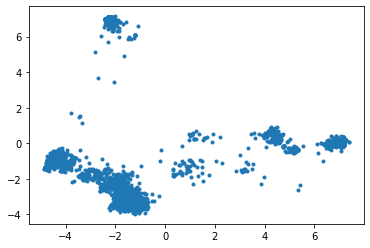

In [35]:
plt.plot(principalComponents[:,0], principalComponents[:,1], ".")

In [36]:
pca.explained_variance_ratio_.cumsum()

array([0.33784928, 0.52281066, 0.64893936])

In [46]:
pca2 = PCA(n_components=3)
principalComponents2 = pca2.fit_transform(model2.theta)

In [47]:
pca2.explained_variance_ratio_.cumsum()

array([0.42094197, 0.62181089, 0.74645388])

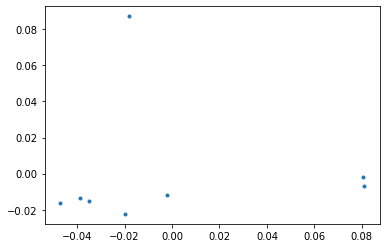

In [48]:
plt.plot(principalComponents2[:,0], principalComponents2[:,1], ".")

In [0]:
import seaborn as sns



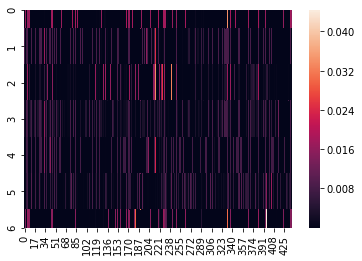

In [51]:
sns.heatmap(model1.theta)

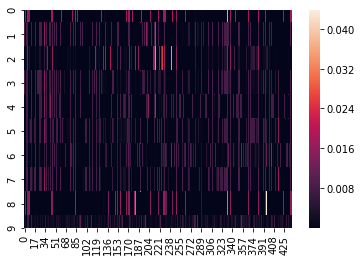

In [52]:
sns.heatmap(model3.theta)

The following generates the distribution (as a dict) of amount of variations per strand in the specified region. I.e. {n : #strands with n variations}. And chooses one of the amounts according to the distribution.

In [25]:
distribution = data_manager.get_variation_distribution(start = 17671934, end = 17681934, population = "CHB")
choices = []
probabilities = []
for choice in distribution:
    choices.append(choice)
    probabilities.append(distribution[choice])
choices = np.array(choices)
probabilities = np.array(probabilities) / sum(probabilities)
print("Choices: {}".format(choices))
print("Probabilities: {}".format(probabilities))
np.random.choice(choices, p=probabilities)